## Data Preprocess

In [51]:
import pandas as pd
import numpy as np
from copy import deepcopy
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
df = pd.read_csv("data/data_ma.csv")
df.count()

/var/folders/jw/fbxyh3ln4nx_m5d05tqlx_dc0000gp/T/ipykernel_27190/3808477144.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data_ma.csv")


user_id             1253377
name_x              1253368
time                1253377
rating              1253377
text                 660093
pics                  39142
resp                  91511
gmap_id             1253377
name_y              1253377
address             1252947
description         1072793
latitude            1253377
longitude           1253377
category            1253377
avg_rating          1253377
num_of_reviews      1253377
price               1143581
hours               1223481
MISC                1246033
state                633735
relative_results    1240717
url                 1253377
dtype: int64

In [3]:
df_clean = df[['user_id','name_y','gmap_id','num_of_reviews','latitude','longitude','price','rating','avg_rating','text']].sort_values(by=['user_id', 'gmap_id'])
df_clean = df_clean.dropna()
df_clean = df_clean[~df_clean['price'].isin(['₩₩','₩','₩₩₩'])]
one_hot = pd.get_dummies(df_clean['price'])
df_clean = pd.concat([df_clean, one_hot], axis=1)
df_clean

,user_id,name_y,gmap_id,num_of_reviews,latitude,longitude,price,rating,avg_rating,text,$,$$,$$$,$$$$
845470,1.000001e+20,Wendy's,0x89e3795251fd454b:0x4f01d3736bcdfa3e,1938,42.287219,-71.106579,$,3,3.5,Long lines at the drive through. Takes a long ...,True,False,False,False
453789,1.000001e+20,Lincoln Tavern & Restaurant,0x89e37a8987d440e9:0x89c8b6df7d92e4f7,1292,42.336315,-71.047597,$$,4,4.4,I love the food but parking is horrible. I had...,False,True,False,False
912038,1.000002e+20,Lord Hobo Cambridge,0x89e370b2901c3261:0xe57850ab0b46d7a1,1078,42.368725,-71.094955,$$,4,4.4,The food is good for Boston but nothing to rav...,False,True,False,False
1227760,1.000002e+20,Oleana,0x89e370b2d41372af:0xae84228b09fd944f,1098,42.370549,-71.097186,$$$,5,4.7,"Tasty and interesting food, beautiful patio, g...",False,False,True,False
661833,1.000002e+20,Hokkaido Ramen Santouka Harvard Square,0x89e37743508533dd:0x4243a046d8931294,2028,42.372129,-71.115887,$$,4,4.5,Simple but tasty ramen,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765084,1.184463e+20,McDonald's,0x89e406ca71bbe19d:0xaf026a7a38f62f3,748,42.275872,-71.853634,$,5,3.3,This McDonald's is superior to main st McDonal...,True,False,False,False
469960,1.184463e+20,Five Guys,0x89e407db5b23c923:0xbce15ed730ef70bf,534,42.294258,-71.773832,$$,5,4.3,Best fries ever,False,True,False,False
549277,1.184466e+20,Max Noodles,0x89e3a1d46da1adc9:0xaabaf505d8a62f19,228,42.538611,-71.243056,$,5,4.5,"Wow Probably the best Noodles I had, i belive ...",True,False,False,False
1129892,1.184466e+20,Not Your Average Joe's,0x89e4802bf698bb03:0x169db237b41baf59,798,42.209501,-71.150191,$$,5,4.1,"Love this restaurant, pricey but worth it to t...",False,True,False,False


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589985 entries, 845470 to 399904
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         589985 non-null  float64
 1   name_y          589985 non-null  object 
 2   gmap_id         589985 non-null  object 
 3   num_of_reviews  589985 non-null  int64  
 4   latitude        589985 non-null  float64
 5   longitude       589985 non-null  float64
 6   price           589985 non-null  object 
 7   rating          589985 non-null  int64  
 8   avg_rating      589985 non-null  float64
 9   text            589985 non-null  object 
 10  $               589985 non-null  bool   
 11  $$              589985 non-null  bool   
 12  $$$             589985 non-null  bool   
 13  $$$$            589985 non-null  bool   
dtypes: bool(4), float64(4), int64(2), object(4)
memory usage: 51.8+ MB


In [5]:
sampled_df = df_clean.sample(frac=0.1, random_state=42)
sampled_df

,user_id,name_y,gmap_id,num_of_reviews,latitude,longitude,price,rating,avg_rating,text,$,$$,$$$,$$$$
1122162,1.038063e+20,McDonald's,0x89e307a27e4aee3f:0x7845b9d47634b94a,1117,42.705037,-71.168723,$,2,3.6,Food very oily,True,False,False,False
953557,1.021010e+20,QDOBA Mexican Eats,0x89e37a18b6de39df:0x5d3e6750e76e4f4c,794,42.339767,-71.090901,$,5,4.2,"Never been to a Qdoba before, and I must say I...",True,False,False,False
593861,1.085886e+20,Thornton's,0x89e37a11b08c434f:0x43f53b4de61866a2,803,42.344979,-71.081884,$,5,4.3,Great breakfast spot. Great prices and portions,True,False,False,False
1244027,1.126265e+20,Brax Landing Restaurant,0x89fb3fb5753283ad:0xf94514a243ef4d55,1104,41.669767,-70.060278,$$,5,4.4,"View, frozen drinks, and food are all amazing....",False,True,False,False
787762,1.049673e+20,Antonio’s Pizza By The Slice Kitchen & Bar - W...,0x89e4069066fb8a77:0x33fed476069e1b94,1695,42.261697,-71.822694,$,5,4.4,"Great food, you can get pizza by the slice if ...",True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088340,1.060297e+20,Stoddard's Fine Food & Ale,0x89e3709d2b27958b:0x40a0e32c1d5f2a20,908,42.355130,-71.061709,$$,3,4.2,Good variety of beers. Very large food portion...,False,True,False,False
873202,1.019863e+20,The Cheesecake Factory,0x89e37d3dfc14dd9d:0xaff6351f245e33e2,2158,42.222048,-71.024890,$$,5,4.1,Great place,False,True,False,False
1183877,1.124222e+20,Popeyes Louisiana Kitchen,0x89e6dd550f1af1d7:0xefa746157422fbc8,1054,42.134685,-72.523380,$,5,3.6,Love their shrimp,True,False,False,False
1106955,1.020069e+20,TGI Fridays,0x89e3711836b33e07:0xe54c9c389f21ed5f,1155,42.400834,-71.068765,$$,5,3.5,(Translated by Google) It takes longer is good...,False,True,False,False


Since our dataset is too large, we sample 10% of our data to conduct some basic recommendation model without the use of text data. Based on these results, we find the neccessity of using text data as an important feature to achieve better performance in recommendation. 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop(['rating','text','name_y','price','user_id','gmap_id'], axis=1), 
                                                    sampled_df[['rating']], 
                                                    test_size=0.3, random_state = 42)
X_train

,num_of_reviews,latitude,longitude,avg_rating,$,$$,$$$,$$$$
987446,981,42.418118,-71.108858,4.6,True,False,False,False
1141236,1370,42.135345,-72.625044,4.0,False,True,False,False
1096462,177,42.368292,-71.076520,3.7,True,False,False,False
238824,283,42.557766,-70.878878,3.8,False,True,False,False
1231115,3464,42.353665,-71.048757,4.2,False,True,False,False
...,...,...,...,...,...,...,...,...
99054,115,42.770130,-71.075183,4.0,True,False,False,False
1173662,1988,42.350297,-71.038247,4.0,False,True,False,False
458025,188,42.103903,-72.635381,4.4,True,False,False,False
293417,166,42.296031,-71.087197,4.0,True,False,False,False


## XGBoost: content-based recommendation

In [10]:
import xgboost as xgb
model1 = xgb.XGBRegressor(objective='reg:squarederror')
model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
pred1 = model1.predict(X_test)
rmse = np.sqrt(np.mean((pred1 - y_test.to_numpy())**2))
print(f'content-based rmse = {rmse}')

content-based rmse = 1.2272550129399729


In [48]:
feature_importance = pd.DataFrame(model1.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                Importance
avg_rating        0.663530
longitude         0.059916
latitude          0.057346
$                 0.055563
$$                0.050881
$$$               0.049940
num_of_reviews    0.048109
$$$$              0.014716


Based on the feature importance extracted from the XGBoost model, it appears that the prediction of customer ratings relies heavily on the average rating of the restaurant. This observation stems from the absence of user-specific features in the dataset that could capture individual preferences towards restaurants. Consequently, our current recommendation system may not yield satisfactory results.

Given that the only available user information is derived from their review texts, we recognize the need to extract users' personal preferences from text. To address this limitation, we intend to implement language models such as BERT. By leveraging BERT, we aim to transform user review texts into meaningful vectors, thereby enhancing the efficacy of our recommendation system.

## Matrix Factorization: item collaborative filtering

In [13]:
utility = sampled_df.pivot_table(index = 'gmap_id', columns = 'user_id', values = 'rating', aggfunc='mean')
utility = utility.fillna(0)
utility.head()

user_id,1.000002e+20,1.000017e+20,1.000018e+20,1.000020e+20,1.000023e+20,1.000024e+20,1.000030e+20,1.000050e+20,1.000050e+20,1.000054e+20,...,1.184434e+20,1.184435e+20,1.184441e+20,1.184446e+20,1.184449e+20,1.184449e+20,1.184461e+20,1.184461e+20,1.184462e+20,1.184466e+20
gmap_id,,,,,,,,,,,,,,,,,,,,,
0x405c5a74b3440383:0xa36c9c1781e4be1f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x405d7d631ff16add:0x9bed826678184414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x405da83bbc3429bf:0x7b0a2daaa5c78907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x864819503264d297:0x2b4de82586d8bfef,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x89d312eb200a664f:0xb4bbc8c45ca9f926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# similarity = 1- distance
distance_mtx = squareform(pdist(utility, 'cosine'))
similarity_mtx = 1- distance_mtx

In [53]:
similarity_mtx.shape

(4393, 4393)

In [56]:
similarity_mtx

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.1556432,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.1556432, 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

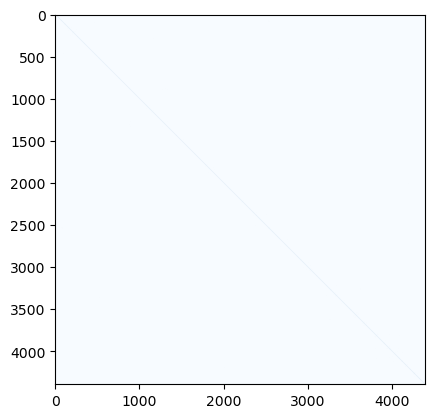

In [40]:
plt.imshow(similarity_mtx, cmap = 'Blues') #too sparse

In [29]:
#recommend by matrix factorization
#item-item collaborative filtering model

def calculate_user_rating(userid, similarity_mtx, utility):
    user_rating = utility.loc[:,userid]
    pred_rating = deepcopy(user_rating)
    
    default_rating = user_rating[user_rating>0].mean()
    numerate = np.dot(similarity_mtx, user_rating)
    corr_sim = similarity_mtx[:, user_rating >0]
    for i,ix in enumerate(pred_rating):
        temp = 0
        if ix < 1:
            w_r = numerate[i]
            sum_w = corr_sim[i,:].sum()
            if w_r == 0 or sum_w == 0:
                temp = default_rating
            else:
                temp = w_r / sum_w
            pred_rating.iloc[i] = temp
    return pred_rating

In [41]:
res = calculate_user_rating(userid=sampled_df.user_id.iloc[21],
                            similarity_mtx=similarity_mtx,
                            utility=utility)
res

gmap_id
0x405c5a74b3440383:0xa36c9c1781e4be1f    5.0
0x405d7d631ff16add:0x9bed826678184414    5.0
0x405da83bbc3429bf:0x7b0a2daaa5c78907    5.0
0x864819503264d297:0x2b4de82586d8bfef    5.0
0x89d312eb200a664f:0xb4bbc8c45ca9f926    5.0
                                        ... 
0x89fca77e3b810389:0x6a6bdb1acb82a3cf    5.0
0x89fca77e3c0f8823:0xa9ca279d40d03c03    5.0
0x89fca77e63bf1171:0xfe805276d1a642b7    5.0
0x89fca77e7dd46023:0x5a13b696296b8553    5.0
0x89fca7819984e3ef:0xe8cc9516b964edaa    5.0
Name: 1.1052638778170062e+20, Length: 4393, dtype: float64

Due to the limited number of user-restaurant pairs available for calculating similarities between users, our attempts to employ item collaborative filtering for recommendation have proven ineffective. To address this challenge in the next iteration of our model, we intend to incorporate textual information into the similarity computation process. Additionally, we plan to extract a subset of the data containing denser user-restaurant pairings. This subset will provide us with more meaningful data points to leverage similarities between users for recommendation purposes. Moreover, reducing the dimensionality of the data will help streamline the NLP task, making it less time-consuming.

## Implementation Plan

1) Take a subset of our dataset where the user-restaurant pair is more dense(Ex: Only users who have more than 20 reviews are kept)

2) Transform review texts into vectors using language model like BERT

3) Learn different variant of recommendation algorithm that can be applied to our project

4) Incorporate review vectors with other factors in the dataset into the recommendation algorithm

5) Find a reliable way to evaluate the performance of our recommendation algorithm 